# Pandas
## Introduction to pandas for marketing

In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing data
marketing=pd.read_csv('marketing.csv')

In [3]:
#inspecting data
marketing.head(20)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True
5,a100000034,1/1/18,House Ads,personalization,True,German,German,45-55 years,1/1/18,NaN,House Ads,True
6,a100000035,1/1/18,House Ads,personalization,True,English,English,55+ years,1/1/18,NaN,House Ads,True
7,a100000036,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
8,a100000037,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
9,a100000038,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True


### Summary statistics
Use the describe() method to print the statistics of all columns in your dataset. You can inspect the output to find some obvious errors. For example, if you see negative values in a date column, this might indicate an error. In addition, pay careful attention to the minimum and maximum values. If the maximum is much larger than the median, it might be an outlier and merit further investigation.

In [4]:
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


### Missing values & data types
Finally, you can identify the data types and the number of non-missing values in your DataFrame using the info() method. The result includes all columns and their data types.

In [5]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


## Data types and data merging
In this lesson, we will talk about various techniques to manipulate data using Pandas.
### Common data types
Each column in a pandas DataFrame has a specific data type. Some of the common data types are strings (which are represented as objects), numbers(floats, integers), boolean values (which are True/False) and dates.

### Data type of a column
You can use the dtype attribute if you are interested in knowing the data type of a single column.

In [6]:
#Print a data type od a single column
print(marketing['converted'].dtype)

object


In [7]:
#Changing the data type of a column
marketing['converted']=marketing['converted'].astype('bool')

In [8]:
print(marketing['converted'].dtype)

bool


###  Creating new boolean columns
The marketing_channel column captures the channel a user saw a marketing asset on. Say you want to have a column that identifies if a particular marketing asset was a house ad or not. You can use numpy's where() function to create a new boolean column to establish this. The first argument is an expression that checks whether the value in the marketing_channel column is 'House Ads', the second argument is the value you want to assign if the expression is true, and the third argument is the value you want to assign if the expression is false.

In [9]:
marketing['is_house_ads']=np.where(marketing['marketing_channel']=='House Ads',
                                   True,False)

In [10]:
marketing['is_house_ads'].head()

0    True
1    True
2    True
3    True
4    True
Name: is_house_ads, dtype: bool

###  Mapping values to existing columns
Due to the way pandas stores data, in a large dataset, it can be computationally inefficient to store columns of strings. In such cases, it can speed things up to instead store these values as numbers. To create a column with channel codes, build a dictionary that maps the channels to numerical codes. Then, use the map() method on the channel column along with this dictionary, as shown here.

In [11]:
channel_dict={'House Ads':1,'Instagram':2,'Facebook':3,'Email':4,'Push':5}
marketing['channel_code']=marketing['marketing_channel'].map(channel_dict)
marketing['channel_code'].head(10)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: channel_code, dtype: float64

In [12]:
marketing['marketing_channel'].unique()

array(['House Ads', 'Push', 'Facebook', 'Instagram', 'Email', nan],
      dtype=object)

### Date columns
Often, you will have date columns that are improperly read as objects by pandas. However, as you will see in the following lessons, having date columns properly imported as the datetime datatype has several advantages. You have two options to ensure that certain columns are treated as dates. First, when importing the dataset using the read_csv() function, you can pass a list of column names to the parse_dates argument to ensure that these columns are correctly interpreted as date columns.

Another option is to use the pandas' datetime() function to convert a specific column.

In [13]:
# Read date columns using parse_dates
#marketing=pd.read_csv('marketing.csv',
#                     parse_dates=['date_served',
#                                 'date_subscribed',
#                                 'date_canceled'])

# or
#Convert already existing column to datetime
marketing['date_served']=pd.to_datetime(marketing['date_served'])

In [14]:
marketing['date_subscribed']=pd.to_datetime(marketing['date_subscribed'])
marketing['date_canceled']=pd.to_datetime(marketing['date_canceled'])

Once the dates in the column are properly imported, you can use various date attributes to extract relevant information. For example, to obtain the day of the week, you can use the dayofweek attribute along with the dt accessor on the date column. This will result in a numerical value where 0 maps to Monday, 1 to Tuesday, and so on.

In [15]:
marketing['day_served']=marketing['date_served'].dt.dayofweek

In [16]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool


In [17]:
# Add the new column is_correct_lang, which is 'Yes' if the user was shown the ad in their preferred language, 'No' otherwise.
marketing['is_correct_lang'] = np.where(
                            marketing['language_displayed']==marketing['language_preferred'],
                            'Yes', 'No')

## Initial Exploratory Analysis
### How many users see marketing assets?
To begin, let's get a sense of how many unique users see our marketing assets each day. We can use the groupby() method on the marketing DataFrame. To group by date, we pass 'date_served' as the argument to groupby(). Next, we select the user_id column outside of the groupby() and use nunique() method to count the number of unique users each day. Looks like about 300 users each day see our ads.

In [18]:
#Aggregate unique users that see ads by date
daily_users=marketing.groupby(['date_served'])['user_id'].nunique()
daily_users

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64

 ### Visualizing results
As you can see, it's not easy to interpret results when they're printed in a table. It's much easier to notice fluctuations in our metrics when we plot them. We first import matplotlib dot pyplot as plt. Then, we plot the series daily_users. It's good practice to always add title and labels to your plot in order to clearly convey what information the chart contains. You can add a title using plt dot title(), and add x and y labels using plt dot xlabel() and plt dot ylabel() functions, respectively. We also rotate the xticks, in this case, the date labels, by 45 degrees to increase legibility. Finally, don't forget to include a call to plt dot show() to display the plot.

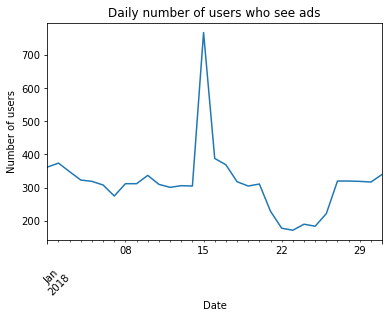

In [19]:
import matplotlib.pyplot as plt

# Plot
daily_users.plot()

# Annotate
plt.title('Daily number of users who see ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
plt.show()

# Exploratory Analysis  & Summary Statistics

## Introduction to common marketing metrics

### Was the campaign successful?
As a data professional, you will often find yourself translating business questions into measurable outcomes. One of the most common questions you might be asked is, "Was the campaign successful?". At first, this might feel like an intimidating question. There are so many ways one could measure campaign success! That said, there are a few kinds of metrics you will find yourself using over and over again. For a marketing team, campaign success is typically measured by conversion rate. This is to say, of all the people who came into contact with your marketing campaign, how many bought the product? Depending on the business, this could mean that a person made a purchase or subscribed to your service. In addition, many subscription businesses care about retention. Once a user has signed up for a subscription, are they still a subscriber one, three or twelve months in? This metric can be particularly difficult to measure because it requires patience. We can't know 90-day retention rates until 90 days have passed since a user initially subscribed.


### Conversion rate
Conversion rate is the percentage of people that we market to who ultimately convert to our product. In this course, we will be focusing on a subscription service and will be talking about conversion in terms of subscriptions.
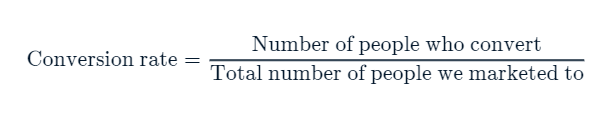

In [25]:
suscribers=marketing[marketing['converted']==True]['user_id'].nunique()

In [22]:
total=marketing['user_id'].nunique()

In [26]:
conv_rate=suscribers/total

In [27]:
print(round(conv_rate*100,2),'%')

14.09 %


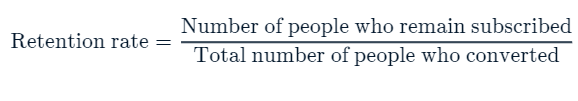

### Calculating retention rate

To determine retention rate, we first calculate the total number of users who remain subscribers after one month. This information is available in the column "is_retained". We now slice the DataFrame to include only rows where the user was retained, that is, where is_retained equals True and count the unique user_ids. We can reuse our "subscribers" calculation from the conversion rate calculation, as the number of total users who originally subscribed remains the same. Finally, we divide the number of users who were retained by the number of users who subscribed to calculate the retention rate.

In [31]:
retained=marketing[marketing['is_retained']==True]['user_id'].nunique()

In [32]:
retention=retained/suscribers
print(round(retention*100,2),'%')

676.41 %


In [33]:
retained

6967

In [34]:
suscribers

1030

## Customer Segementation

###  Common ways to segment audiences
In addition to high-level metrics, it's important to segment customers by who you're marketing to. Segmenting means breaking down metrics by specific characteristics. For instance, in addition to looking at conversion rates overall, you might also want to look at conversion rate by age group. It's possible that a campaign had a low conversion rate overall, but was super effective for users who were 55 years and up. Rather than calling the campaign a failure, your team has learned a new way to market to older individuals! That's great news! You could use these results to conduct a campaign where users 55 years and up receive a different marketing technique than everyone else.

In [36]:
#Subset to include only House Ads
house_ads=marketing[marketing['subscribing_channel']=='House Ads']

In [38]:
house_ads

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ads,channel_code,day_served,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,a100000514,2018-01-26,House Ads,personalization,True,English,English,19-24 years,2018-01-26,NaT,House Ads,True,True,1.0,4.0,Yes
350,a100000515,2018-01-27,House Ads,personalization,True,English,English,24-30 years,2018-01-27,NaT,House Ads,True,True,1.0,5.0,Yes
351,a100000523,2018-01-28,House Ads,personalization,True,English,English,0-18 years,2018-01-28,NaT,House Ads,True,True,1.0,6.0,Yes
352,a100000524,2018-01-30,House Ads,personalization,True,English,Spanish,19-24 years,2018-01-30,NaT,House Ads,True,True,1.0,1.0,No


In [37]:
retained=house_ads[house_ads['is_retained']==True]['user_id'].nunique()

In [39]:
subscribers=house_ads[house_ads['converted']==True]['user_id'].nunique()

In [40]:
retention_rate=retained/subscribers
print(round(retention_rate*100,2),'%')

58.05 %
